In [1]:
# 1. Run the clustering algorithms on the datasets and describe what you see.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from preprocessor import preprocess_dodgers, preprocess_wine_combo

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_completeness_v_measure, calinski_harabasz_score 

import pickle
import time

random_state = 1337

In [2]:
# X_train, X_test, y_train, y_test = preprocess_dodgers()
# dataset_name = "Dodgers"

X_train, X_test, y_train, y_test, X_train_color, X_test_color = preprocess_wine_combo()
dataset_name = "Wine"
y_train = X_train_color
dataset_name = "Wine"

range_n_clusters = range(2, 33)

In [3]:
models = {}
y_preds = {}
aics = {}
bics = {}
scores = {}
scores_samples = {}
times = {}

silhouette_scores = {}
calinski_harabasz_scores = {}


for n_clusters in range_n_clusters:
    start_time = time.time()
    models[n_clusters] = GaussianMixture(n_components=n_clusters, random_state=random_state).fit(X_train)
    y_preds[n_clusters] = models[n_clusters].predict(X_train)
    end_time = time.time()
    times[n_clusters] = end_time - start_time
    
#     plt.title("EM")
#     plt.xlabel("plate_x")
#     plt.ylabel("plate_z")
#     plt.scatter(X_train["plate_x"], X_train["plate_z"], c=y_preds[n_clusters])
#     plt.show()
    
    aics[n_clusters] = models[n_clusters].aic(X_train)
    bics[n_clusters] = models[n_clusters].bic(X_train)
    #print(f"AIC: {aics[n_clusters]}\tBIC: {bics[n_clusters]}")
    
    scores[n_clusters] = models[n_clusters].score(X_train)
    scores_samples[n_clusters] = models[n_clusters].score_samples(X_train)    
    
    silhouette_scores[n_clusters] = silhouette_score(X_train, y_preds[n_clusters])
    calinski_harabasz_scores[n_clusters] = calinski_harabasz_score(X_train, y_preds[n_clusters])

In [4]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} EM AIC, BIC")
plt.ylabel("information criterion")
plt.xlabel("n_clusters")
ax.plot(list(aics.keys()), list(aics.values()), marker='.', label="AIC")

ax.plot(list(bics.keys()), list(bics.values()), marker='.', c='C1', label="BIC")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()


In [5]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} EM scores")
plt.ylabel("log likelihood scores")
plt.xlabel("n_clusters")
ax.plot(list(scores.keys()), list(scores.values()), marker='.', label="scores")

plt.legend()
plt.show()


In [6]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} unsupervised metrics")
plt.ylabel("silhouette score")
plt.xlabel("n_clusters")
ax.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='.', label="sil. score")


ax2=plt.twinx()
ax2.plot(list(calinski_harabasz_scores.keys()), list(calinski_harabasz_scores.values()), marker='.', c='C1', label="C-H index")
ax2.set_ylabel("Calinski-Harabasz index")

# https://stackoverflow.com/a/10129461
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="center right")
plt.show()

n_clusters= 2 	average silhouette_score: 0.24874758640101585
n_clusters= 3 	average silhouette_score: 0.19511939872651657
n_clusters= 4 	average silhouette_score: 0.14122003709721834
n_clusters= 5 	average silhouette_score: 0.17790209094180454
n_clusters= 6 	average silhouette_score: 0.09286647020423662
n_clusters= 7 	average silhouette_score: 0.05511317037451119
n_clusters= 8 	average silhouette_score: 0.08321301146836661
n_clusters= 9 	average silhouette_score: 0.06834042994922096
n_clusters= 10 	average silhouette_score: 0.0555204019113423
n_clusters= 11 	average silhouette_score: 0.05550997875640571
n_clusters= 12 	average silhouette_score: 0.03594750070634266
n_clusters= 13 	average silhouette_score: 0.03980363320440861
n_clusters= 14 	average silhouette_score: 0.02345998054787844
n_clusters= 15 	average silhouette_score: 0.04391668566985204
n_clusters= 16 	average silhouette_score: 0.019566838980548774
n_clusters= 17 	average silhouette_score: 0.03026329304791366
n_clusters= 18 	

<ipython-input-7-b2b4bd120610>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1) = plt.subplots(1, 1)


n_clusters= 22 	average silhouette_score: -0.009442016432187969
n_clusters= 23 	average silhouette_score: 0.002572626412297138
n_clusters= 24 	average silhouette_score: 0.009411771857529132
n_clusters= 25 	average silhouette_score: -8.010727906964414e-05
n_clusters= 26 	average silhouette_score: -0.00941572312177847
n_clusters= 27 	average silhouette_score: 0.010350438263774579
n_clusters= 28 	average silhouette_score: 0.00792200977820703
n_clusters= 29 	average silhouette_score: 0.00367384951945673
n_clusters= 30 	average silhouette_score: -0.0004170074961994542
n_clusters= 31 	average silhouette_score: 0.0021860866733805343
n_clusters= 32 	average silhouette_score: 0.0008781023165845262


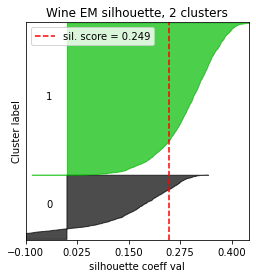

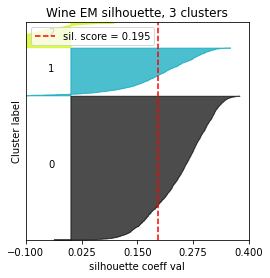

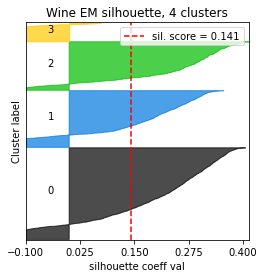

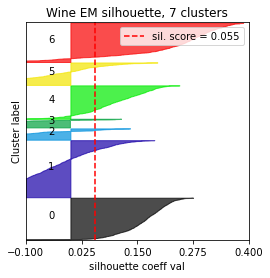

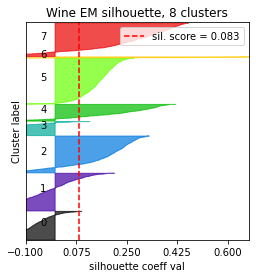

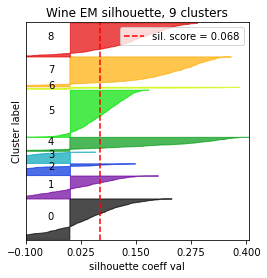

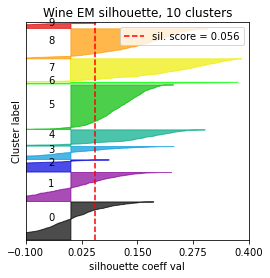

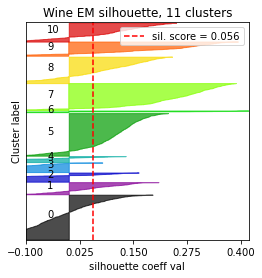

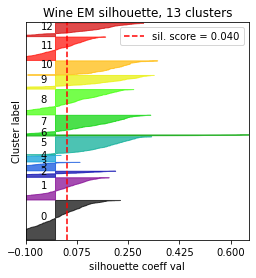

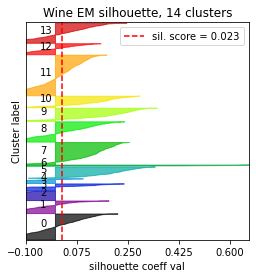

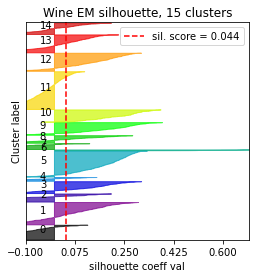

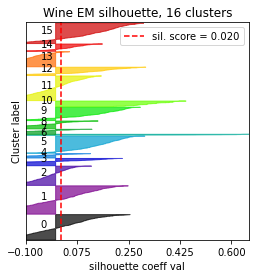

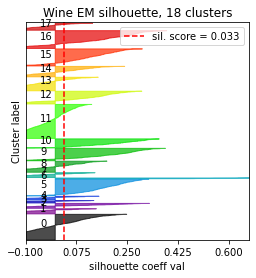

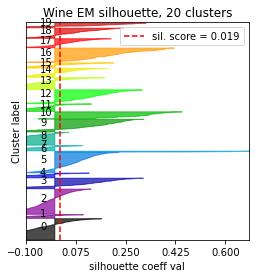

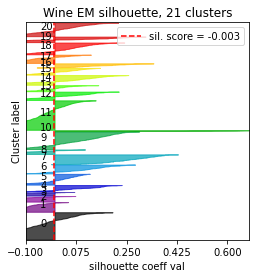

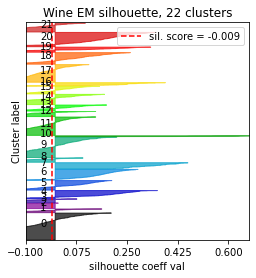

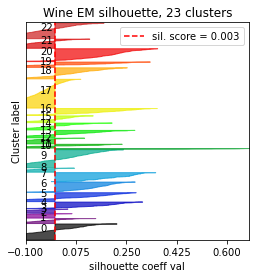

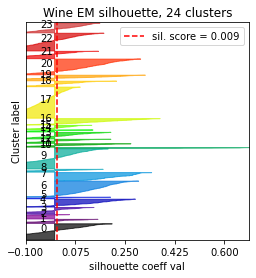

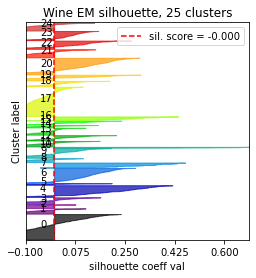

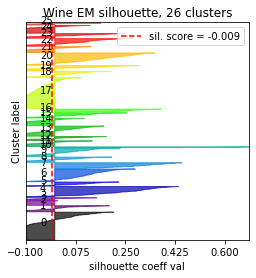

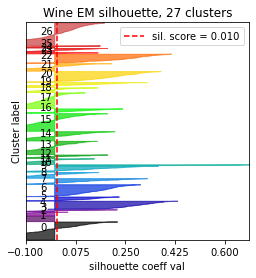

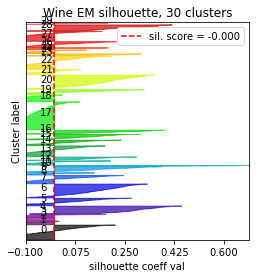

In [7]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

X = X_train
y = y_train

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(4, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = models[n_clusters]
    cluster_labels = y_preds[n_clusters]

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_scores[n_clusters]
    #silhouettes[n_clusters] = silhouette_avg
    print("n_clusters=", n_clusters,
          "\taverage silhouette_score:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    ax1.set_xlim([-0.1, np.max(sample_silhouette_values)])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("silhouette coeff val")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"sil. score = {silhouette_avg:.3f}")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_xticks(list(np.linspace(-0.1, round(np.max(sample_silhouette_values) * 5)/5, 5)))

    plt.title((f"{dataset_name} EM silhouette,"
                  " %d clusters" % n_clusters))
    plt.legend()

plt.show()

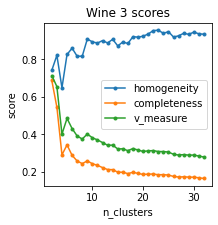

In [8]:
three_measures = {}
for n_clusters in range_n_clusters:
    three_measures[n_clusters] = homogeneity_completeness_v_measure(y_train, y_preds[n_clusters])
    #print(f"{n_clusters} homogeneity: {km_homogeneities[n_clusters]}")
    
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} 3 scores")
plt.ylabel("score")
plt.xlabel("n_clusters")
ax.plot(list(three_measures.keys()), [val[0] for val in three_measures.values()], marker='.', label="homogeneity")
ax.plot(list(three_measures.keys()), [val[1] for val in three_measures.values()], marker='.', label="completeness")
ax.plot(list(three_measures.keys()), [val[2] for val in three_measures.values()], marker='.', label="v_measure")

plt.legend()
plt.show()

In [9]:
# set this
best_n_clusters = 2

In [10]:
aics[best_n_clusters]

113481.56699322106

In [11]:
bics[best_n_clusters]

114497.72169954737

In [12]:
scores[best_n_clusters]

-10.888163074198678

In [13]:
silhouette_scores[best_n_clusters]

0.24874758640101585

In [14]:
calinski_harabasz_scores[best_n_clusters]

1281.4758149239324

In [15]:
three_measures[best_n_clusters]

(0.7416100090643877, 0.6871440859342569, 0.7133388923707379)

In [16]:
# this takes a really long time, so don't accidentally do one we don't need
do_pairplot = False
if do_pairplot:
    seaborn_temp = X_train
    seaborn_temp["y_pred"] = y_preds[best_n_clusters]

    # https://stackoverflow.com/a/33412861
    g = sns.PairGrid(seaborn_temp, hue="y_pred")
    g = g.map_offdiag(plt.scatter, alpha=0.01)
    g = g.map_diag(plt.hist, alpha=0.5)

    xlabels,ylabels = [],[]

    for ax in g.axes[-1,:]:
        xlabel = ax.xaxis.get_label_text()
        xlabels.append(xlabel)
    for ax in g.axes[:,0]:
        ylabel = ax.yaxis.get_label_text()
        ylabels.append(ylabel)

    for i in range(len(xlabels)):
        for j in range(len(ylabels)):
            g.axes[j,i].xaxis.set_label_text(xlabels[i])
            if i==j:
                g.axes[j,i].yaxis.set_label_text("count")
            else:
                g.axes[j,i].yaxis.set_label_text(ylabels[j])

    g.savefig(f"output/{dataset_name}/em-pairplot.png")

In [17]:
best_y_pred = pd.DataFrame(y_preds[best_n_clusters])
best_y_pred.to_csv(f"output/{dataset_name}/em-train-k={best_n_clusters}-clusters.csv")
pickle.dump(models[best_n_clusters], open(f"output/{dataset_name}/em-bestmodel-k={best_n_clusters}.p", "wb"))

In [18]:
X_test_predicted = pd.DataFrame(models[best_n_clusters].predict(X_test))
X_test_predicted.to_csv(f"output/{dataset_name}/em-test-k={best_n_clusters}-clusters.csv")